## 샘플 데이터와 Hierarchical Clustering

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

## 1. Data

### 1.1 Sample data

In [12]:
data = np.array(
    [
        (1, 5),
        (2, 4),
        (4, 6),
        (4, 3),
        (5, 3),
    ]
)

In [13]:
data

array([[1, 5],
       [2, 4],
       [4, 6],
       [4, 3],
       [5, 3]])

## 2. Hierarchical Clustering

AgglomerativeClustering 이용.

강의에서 배운 4가지 연결법
1. 최단 연결법
2. 최장 연결법
3. 평균 연결법
4. 중심 연결법

linkage argument
- average
    - 평균 연결법
- complete
    - 최장 연결법
- single
    - 최단 연결법
- ward
    - 중심 연결법 (default)

### 2.1 학습

- 최단 연결법

In [14]:
from sklearn.cluster import AgglomerativeClustering

single_cluster = AgglomerativeClustering(
    distance_threshold=0, n_clusters=None, linkage='single'
)

In [15]:
single_cluster.fit(data)

# label이 따로 필요 없음.

AgglomerativeClustering(distance_threshold=0, linkage='single', n_clusters=None)

### 2.2 Dendrogram

In [16]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1 # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
        
    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    
    dendrogram(linkage_matrix, **kwargs, labels=['A', 'B', 'C', 'D', 'E'])

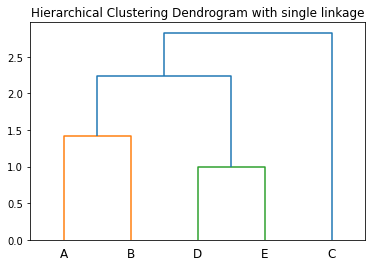

In [17]:
plt.title('Hierarchical Clustering Dendrogram with single linkage')
plot_dendrogram(single_cluster, truncate_mode='level', p=3)
plt.show()

### 2.3 여러 개의 클러스터

- 위에서 사용한 argument들은 데이터 전부를 묶는 방식의 Clustering.
- 아래에선 n개의 clustering으로 만들기.

### 2.3.1 2개의 클러스터

In [18]:
single_cluster_2 = AgglomerativeClustering(
    n_clusters=2, linkage='single'
)

In [19]:
single_cluster_2.fit(data)

AgglomerativeClustering(linkage='single')

In [22]:
single_cluster_2.labels_

# A, B, C, D, E

array([0, 0, 1, 0, 0], dtype=int64)

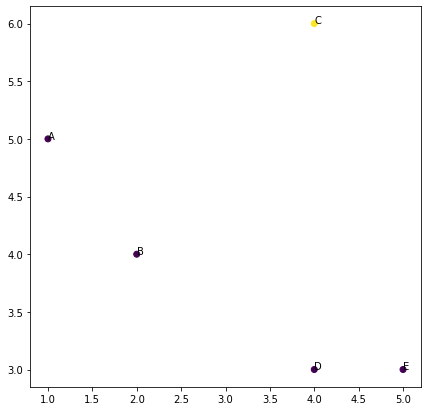

In [21]:
plt.figure(figsize=(7, 7))
plt.scatter(data[:, 0], data[:, 1], c=single_cluster_2.labels_)
for i, txt in enumerate(['A', 'B', 'C', 'D', 'E']):
    plt.annotate(txt, (data[i, 0], data[i, 1]))

### 2.3.2 3개의 클러스터

- 위 dendrogram의 결과로 예상할 수 있음.

In [23]:
single_cluster_3 = AgglomerativeClustering(
    n_clusters=3, linkage='single'
)

In [24]:
single_cluster_3.fit(data)

AgglomerativeClustering(linkage='single', n_clusters=3)

In [25]:
single_cluster_3.labels_

array([0, 0, 1, 2, 2], dtype=int64)

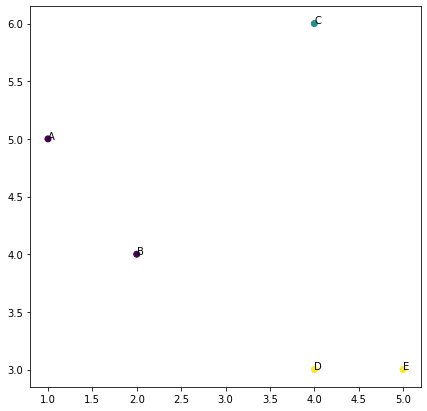

In [26]:
plt.figure(figsize=(7, 7))
plt.scatter(data[:, 0], data[:, 1], c=single_cluster_3.labels_)
for i, txt in enumerate(['A', 'B', 'C', 'D', 'E']):
    plt.annotate(txt, (data[i, 0], data[i, 1]))

## 3. 다른 연결법

### 3.1 평균 연결법

In [36]:
avg_cluster = AgglomerativeClustering(
    distance_threshold=0, n_clusters=None, linkage='average'
)

In [37]:
avg_cluster.fit(data)

AgglomerativeClustering(distance_threshold=0, linkage='average',
                        n_clusters=None)

실제로 강의에서 사용한 것과 같은지?

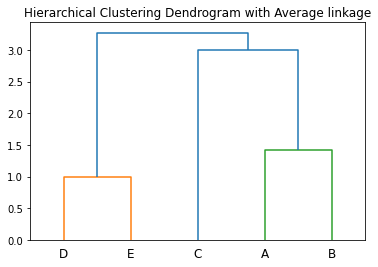

In [38]:
plt.title('Hierarchical Clustering Dendrogram with Average linkage')
plot_dendrogram(avg_cluster, truncate_mode='level', p=3)
plt.show()

### 3.2 최장 연결법

In [39]:
max_cluster = AgglomerativeClustering(
    distance_threshold=0, n_clusters=None, linkage='complete'
)

In [40]:
max_cluster.fit(data)

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        n_clusters=None)

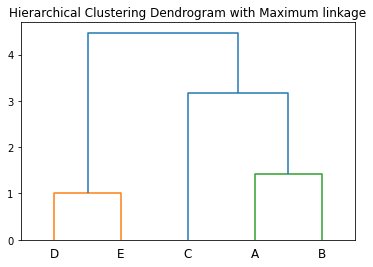

In [42]:
plt.title('Hierarchical Clustering Dendrogram with Maximum linkage')
plot_dendrogram(max_cluster, truncate_mode='level', p=3)
plt.show()

### 3.3 중심 연결법

In [43]:
centroid_cluster = AgglomerativeClustering(
    distance_threshold=0, n_clusters=None, linkage='ward'
)

In [44]:
centroid_cluster.fit(data)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

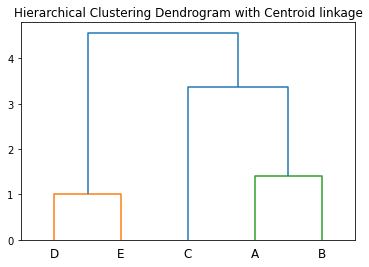

In [46]:
plt.title('Hierarchical Clustering Dendrogram with Centroid linkage')
plot_dendrogram(centroid_cluster, truncate_mode='level', p=3)
plt.show()

## 마무리

In [47]:
clusters = [
    ('Single', single_cluster),
    ('Average', avg_cluster),
    ('Maximum', max_cluster),
    ('Centroid', centroid_cluster),
]

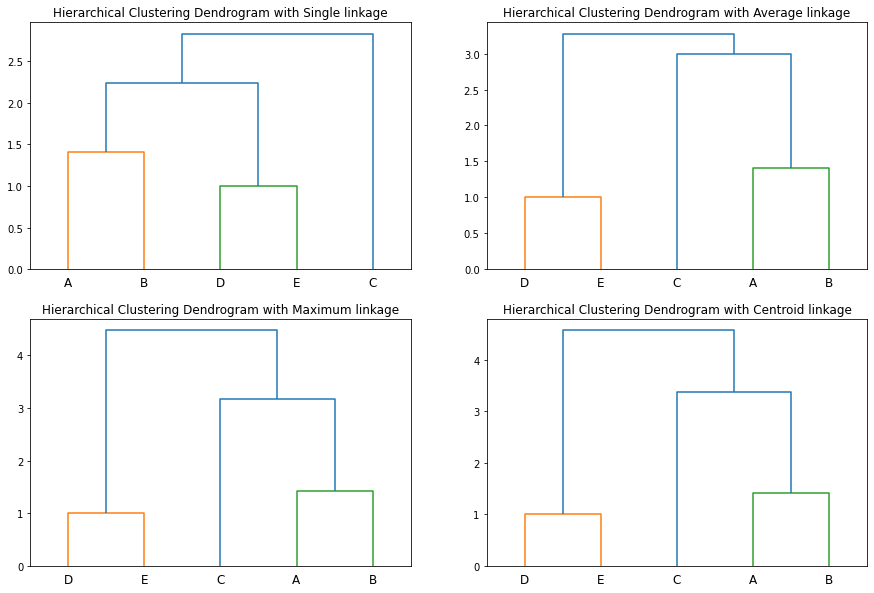

In [49]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for idx, (name, cluster) in enumerate(clusters):
    ax = axes[idx//2, idx%2]
    ax.set_title(f"Hierarchical Clustering Dendrogram with {name} linkage")
    plot_dendrogram(cluster, truncate_mode='level', p=3, ax=ax)